<a href="https://colab.research.google.com/github/AlexeiAltamira/Portfolio/blob/main/Desafio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import matplotlib.pyplot as plt #biblioteca para visualizar graficos que ajudam na análise dos dados

In [ ]:
dados = pd.read_csv('https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F7c207e3f-d962-4cdb-bc6b-f49ed41f77e4%2Fdata.csv?table=block&id=f44f0180-d4c9-4f47-89c9-ee2a263a6169&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=c0845f00-59fb-4a0f-bb4a-c1e2314cd202&cache=v2', encoding='unicode_escape')  #usa biblioteca pandas para abrir arquivo data.csv, que contem os dados a serem analisados, direto do site.

In [ ]:
dados.head(3) #verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado os dados iniciais

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [ ]:
dados.describe() #verificar concentração dos dados e/ ou discrepantes

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
dados.info() #podemos, dessa forma, verificar se há presença de valores nulos e os Dtype.
#Junto a celula anterior podemos identificar, inicialmente, divergencia entre formato do dado de algumas colunas e seu Dtype,
#o que deve ser tratado antes da manipulação dos dados.
#Observa-se também presença de valores nulos, o que inicialmente não foi observado na celula anterior (.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
dados.isna().sum() #Verificar e contar dados nulos em todas as colunas. Já sendo observado valores faltantes da identificação do cliente

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
dados.dropna(subset=['CustomerID'], inplace=True) #eliminar os dados nulos da coluna de identificação do cliente

In [ ]:
dados['CustomerID'].isna().sum() #verificar se ainda há valores nulos na coluna de identificação do cliente

0

In [ ]:
dados.info() #reverificar informações dos dados restantes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
dados['UnitPrice'].isna().sum() #Verificar e conta dados nulos na coluna de preços

0

In [ ]:
dados[dados['UnitPrice']<=0]['UnitPrice'].count() #verifica e conta quantos valores da coluna preço são iguais ou menores que zero

40

In [ ]:
dados = dados[dados['UnitPrice']> 0] #deixando no dataset apenas preços acima de zero

In [ ]:
dados['Quantity'].isna().sum() #Verificar e conta dados nulos na coluna de quantidade

0

In [ ]:
dados[dados['Quantity']<=0]['Quantity'].count() #conta quantos valores da coluna quantidade são iguais ou menores que zero

8905

In [ ]:
dados = dados[dados['Quantity']> 0] #deixando no dataset apenas quantidades acima de zero

In [ ]:
dados.duplicated().sum() #conta quantas linhas são duplicadas

5192

In [ ]:
dados = dados.drop_duplicates() #deixando no dataset apenas os dados não duplicados

In [ ]:
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate']) #transforma a coluna de data do faturamento, que não esta sendo reconhecida corretamente, por Date Time

In [ ]:
dados = dados.astype({'CustomerID': 'int'}) #tranfora a coluna de identificação do clíente em valores inteiros

In [ ]:
dados.info() #verifica novamente os dados para confirmar se todas as alterações foram executadas corretamente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [ ]:
dados[dados['Quantity']>=10000]['Quantity'].count() #realiza contagem das linhas onde quantidade de produtos é maios ou igual a 10 mil

2

In [ ]:
dados[dados['Quantity']>=10000] #mostrar em qual linha com os dados que o comando anterior aparece

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [ ]:
dados = dados[dados['Quantity']<10000] #deixa no dateset somente os dados onde a quantidade de produtos é menor que 10 mil

In [ ]:
dados[dados['UnitPrice']>=5000]['UnitPrice'].count() #realiza contagem das linhas onde o preço unitário é maios ou igual a 5 mil

1

In [ ]:
dados=dados[dados['UnitPrice']<5000] #deixa no dateset somente os dados onde o preço unitário é menor que 5 mil

In [ ]:
dados['Total'] = dados['Quantity'] * dados['UnitPrice'] #cria nova coluna com a multiplicação da coluna quantidade e a coluna preço unitário

In [ ]:
ultimo = dados['InvoiceDate'].max() #identifica a data da última compra registrada no dataset
ultimo #mostra a data da última compra registrada no dataset

Timestamp('2011-12-09 12:50:00')

In [ ]:
pais = dados.groupby(['Country'])[['Total']].sum().sort_values(by='Total', ascending=False).head(10) #agrupa os dados por paises, somado o total de vendas de
#cada um e classificado do maior para o menor.
pais #mostrar a listagem dos 10 paises com maiores valores total em venda


,Total
Country,
United Kingdom,7031228.694
Netherlands,285446.340
EIRE,265262.460
Germany,228678.400
France,208934.310
Australia,138453.810
Spain,61558.560
Switzerland,56443.950
Belgium,41196.340


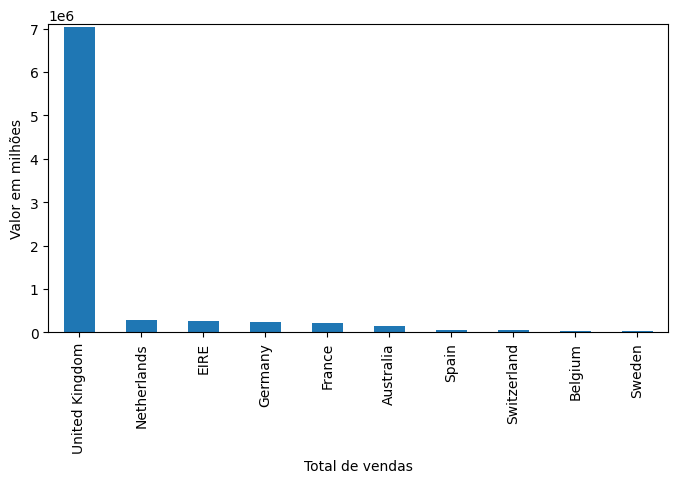

In [ ]:
pd.Series(pais['Total'].plot.bar(figsize=(8,4)))
plt.xlabel('Total de vendas')
plt.ylabel('Valor em milhões')
plt.ylim([0, 7100000])
plt.show() #apresentar o grafico com os 10 paises com maior valor em vendas

In [ ]:
vendas = dados.groupby(by=['Description'])[['Quantity']].sum().sort_values(by='Quantity', ascending=False).head(10) #agrupa por descrição do produto, somado a
#quantidade de cada um e classificado do maior para o menor.
vendas #mostrar a listagem dos 10 produtos mais vendidos

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
ASSORTED COLOUR BIRD ORNAMENT,35263
PACK OF 72 RETROSPOT CAKE CASES,33670
POPCORN HOLDER,30919
RABBIT NIGHT LIGHT,27153
MINI PAINT SET VINTAGE,26076
PACK OF 12 LONDON TISSUES,25329


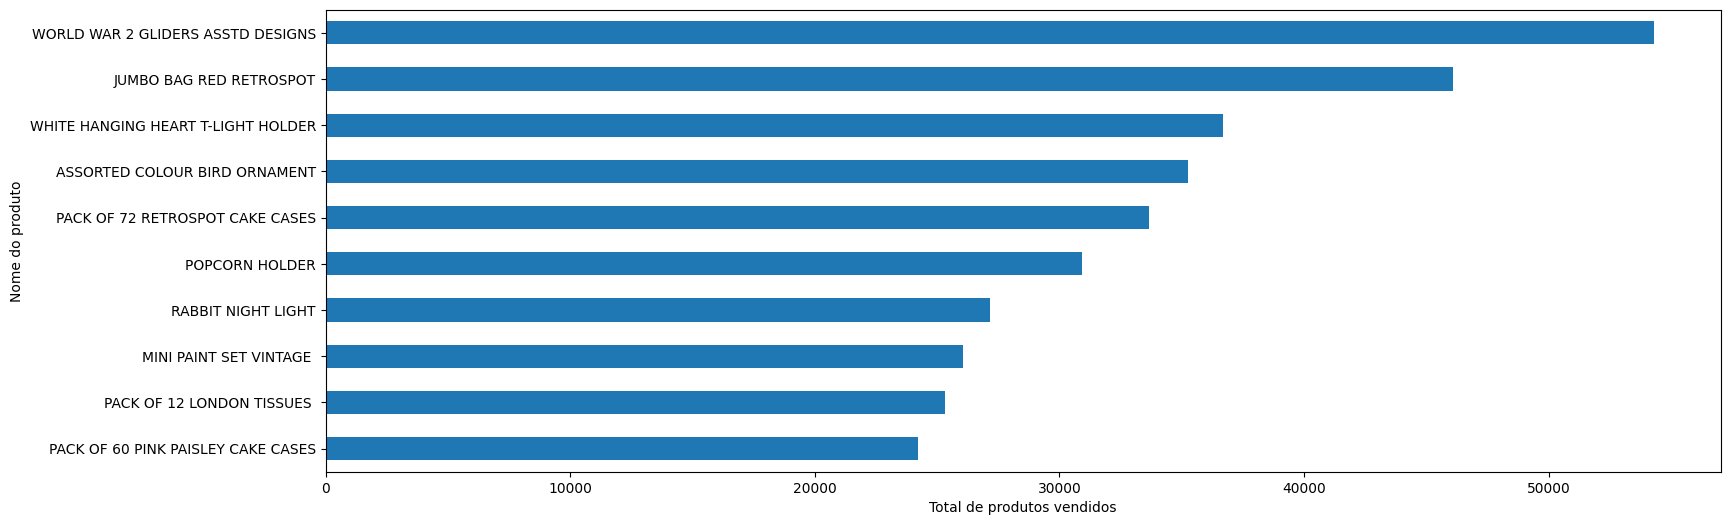

In [ ]:
pd.Series(vendas['Quantity'].sort_values().plot.barh(figsize=(18,6)))
plt.xlabel('Total de produtos vendidos')
plt.ylabel('Nome do produto')
plt.show() #apresenta o grafico com os 10 produtos mais vendidos

In [ ]:
dados['Mês'] = pd.DatetimeIndex(dados['InvoiceDate']).month #cria nova coluna somente com mês da compra, que auxiliara na confecção do próximo gráfico

Text(0, 0.5, 'Valor em milhões')

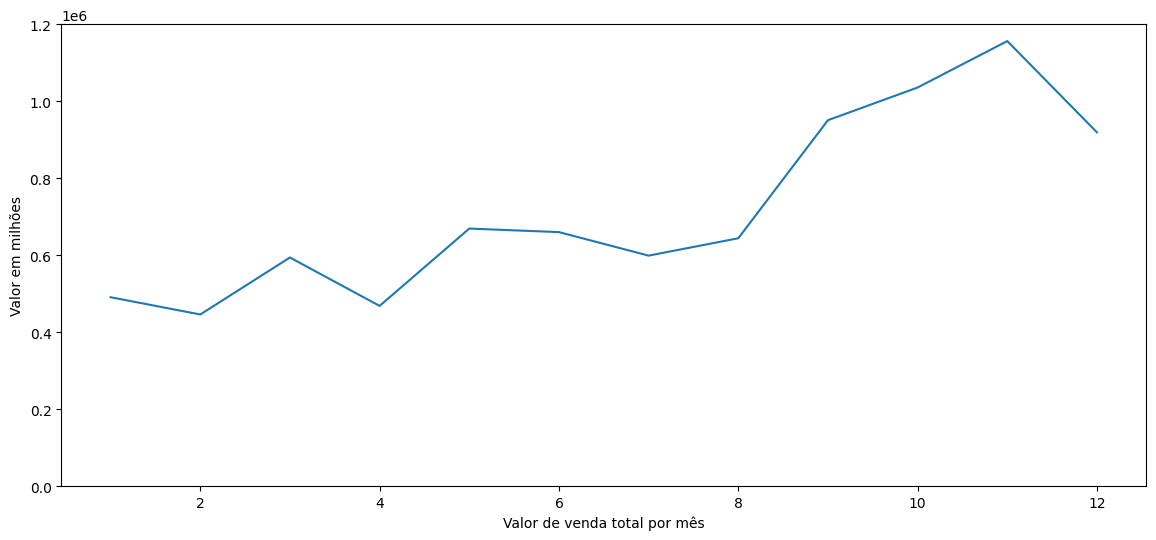

In [ ]:
dados.groupby(by=['Mês'])['Total'].sum().plot(figsize=(14, 6)) #grafico de total de vendas por mês
plt.ylim([0, 1200000])
plt.xlabel('Valor de venda total por mês')
plt.ylabel('Valor em milhões')

In [ ]:
meses = dados.groupby(['Country', 'Mês'])[['Total']].sum().sort_values(by='Mês', ascending=False).reset_index() #agrupa por país e Mês da compra, somado o
#valor total de cada um e classificado por mês do maior para o menor.

In [ ]:
meses.head()

,Country,Mês,Total
0,Poland,12,248.16
1,Switzerland,12,1304.92
2,Japan,12,7705.07
3,Portugal,12,5248.16
4,Spain,12,2159.94


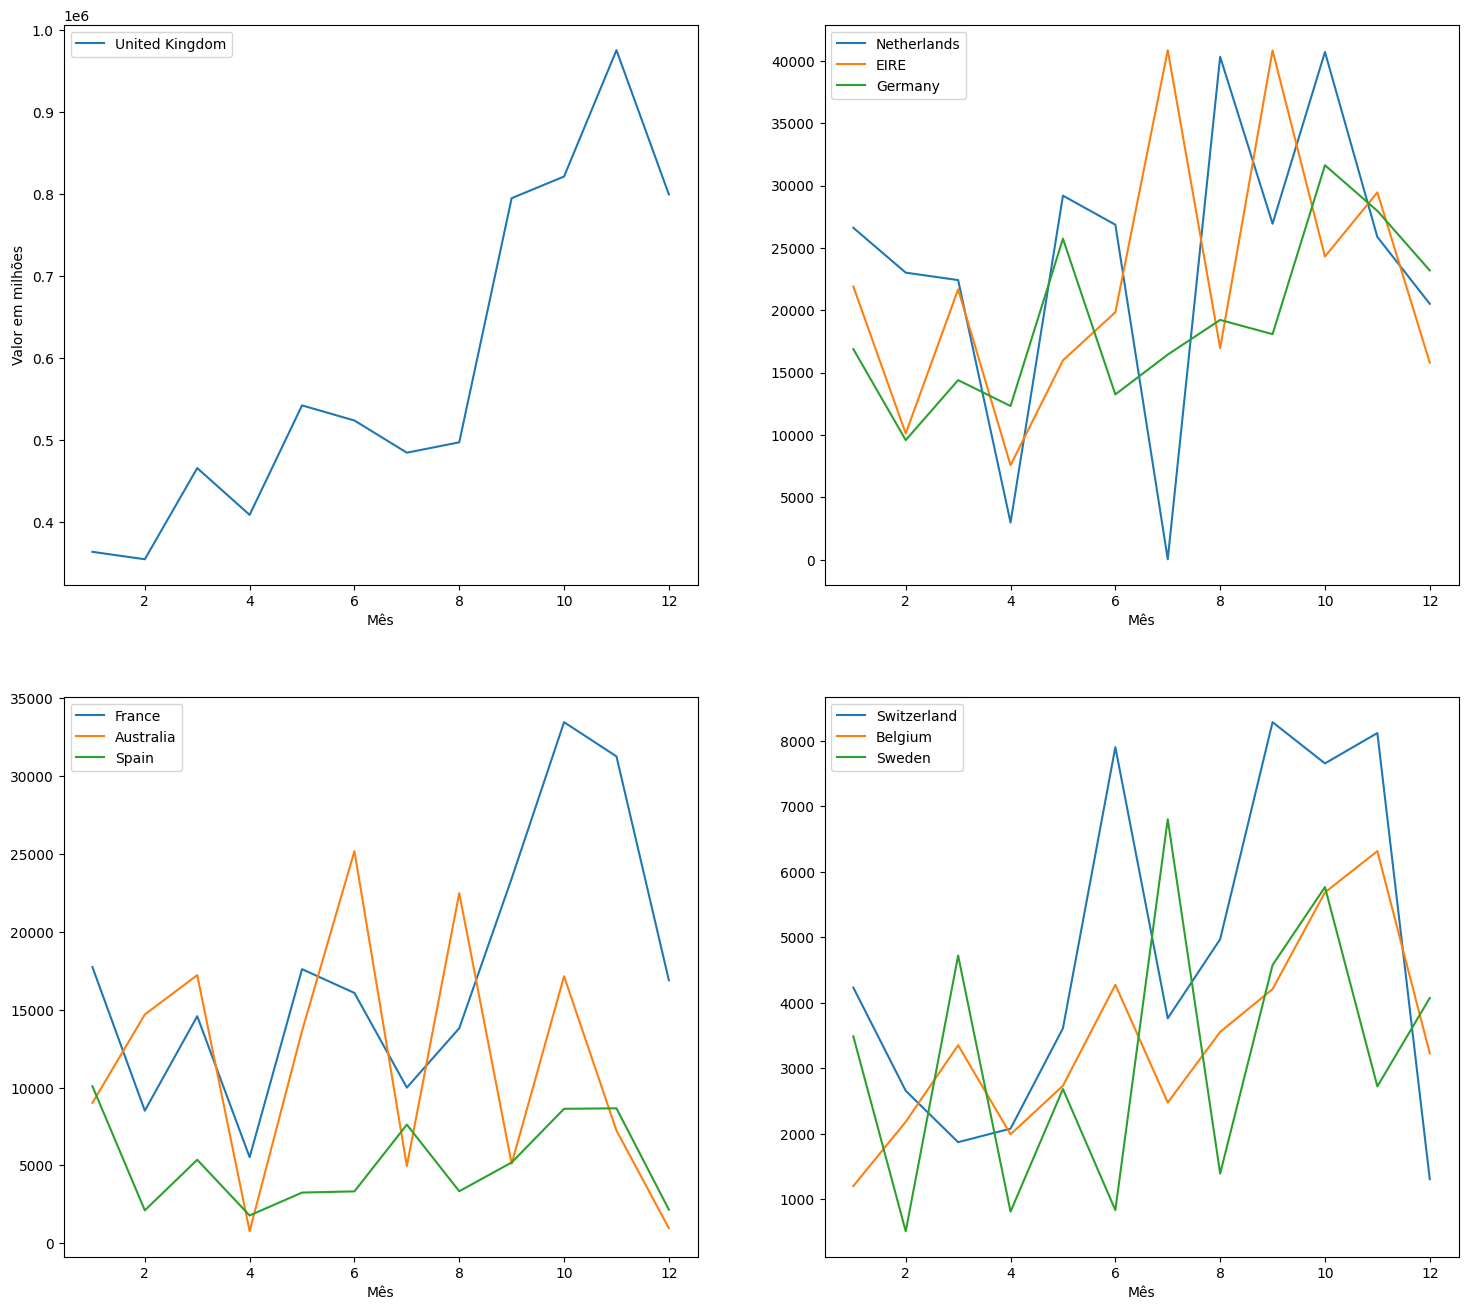

In [ ]:
plt.figure(figsize = ((18, 16)))
plt.subplot(2, 2, 1)
plt.xlabel('Mês')
plt.ylabel('Valor em milhões')
plt.plot(meses['Mês'][(meses['Country']=='United Kingdom')], meses['Total'][(meses['Country']=='United Kingdom')])
plt.legend(['United Kingdom'])
plt.subplot(2, 2, 2)
plt.xlabel('Mês')
plt.plot(meses['Mês'][(meses['Country']=='Netherlands')], meses['Total'][(meses['Country']=='Netherlands')])
plt.plot(meses['Mês'][(meses['Country']=='EIRE')], meses['Total'][(meses['Country']=='EIRE')])
plt.plot(meses['Mês'][(meses['Country']=='Germany')], meses['Total'][(meses['Country']=='Germany')])
plt.legend(['Netherlands', 'EIRE', 'Germany'])
plt.subplot(2, 2, 3)
plt.xlabel('Mês')
plt.plot(meses['Mês'][(meses['Country']=='France')], meses['Total'][(meses['Country']=='France')])
plt.plot(meses['Mês'][(meses['Country']=='Australia')], meses['Total'][(meses['Country']=='Australia')])
plt.plot(meses['Mês'][(meses['Country']=='Spain')], meses['Total'][(meses['Country']=='Spain')])
plt.legend(['France', 'Australia', 'Spain'])
plt.subplot(2, 2, 4)
plt.xlabel('Mês')
plt.plot(meses['Mês'][(meses['Country']=='Switzerland')], meses['Total'][(meses['Country']=='Switzerland')])
plt.plot(meses['Mês'][(meses['Country']=='Belgium')], meses['Total'][(meses['Country']=='Belgium')])
plt.plot(meses['Mês'][(meses['Country']=='Sweden')], meses['Total'][(meses['Country']=='Sweden')])
plt.legend(['Switzerland', 'Belgium','Sweden',])
#graficos dos Valor de venda total por mês e por país, considere apenas os 10 países com mais venda.

In [ ]:
usuario = dados.groupby(by=['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Total'])[['Quantity']].count().sort_values(by='CustomerID', ascending=False).reset_index()
#Agrupe os dados por cliente e pedido, trazendo junto a data da compra e o total, faz a contagem de cada uma delas, tranformando em um novo dataframe
usuario.head(5) #mosta o dataframe recém confecionado

,CustomerID,InvoiceNo,InvoiceDate,Total,Quantity
0,18287,573167,2011-10-28 09:29:00,45.00,1
1,18287,554065,2011-05-22 10:39:00,34.00,1
2,18287,570715,2011-10-12 10:23:00,9.36,3
3,18287,570715,2011-10-12 10:23:00,6.96,1
4,18287,570715,2011-10-12 10:23:00,5.04,2


In [ ]:
usuario = usuario.groupby(['CustomerID']).agg({'InvoiceDate': 'max', 'Quantity':'count', 'Total':'mean'}).sort_values(by='CustomerID').reset_index() #agrupa novamente
#apenas por cliente, identifica a data do última compra, conta a quantidade de compras feitas, mostra a média das compras e ordenando pelo identificador
usuario.head(3) #mostra os três primeiros

,CustomerID,InvoiceDate,Quantity,Total
0,12347,2011-12-07 15:52:00,113,27.132566
1,12348,2011-09-25 13:13:00,20,69.990000
2,12349,2011-11-21 09:51:00,42,27.839048


In [ ]:
cliente = usuario['CustomerID'].reset_index() #cria biblioteca com os dados finais, iniciando com identificador do clíente
cliente = cliente.drop('index', axis='columns')


In [ ]:
cliente['Recencia'] = ultimo - usuario['InvoiceDate'] #cria nova coluna (R-Recencia) com diferença de dias da última compra do cliente e da última compra disponível
#registrada no conjunto de dados

In [ ]:
cliente['Frequencia'] = usuario['Quantity'] #cria nova coluna (F-Frequência) com os dados de quantidade de compras feitas por cada cliente

In [ ]:
cliente['Ticket_medio'] = usuario['Total']#cria nova coluna (M-Ticket médio) com os dados da média das compras feitas por cada cliente

In [ ]:
cliente #mostra dateset com os dados do RFM

,CustomerID,Recencia,Frequencia,Ticket_medio
0,12347,1 days 20:58:00,113,27.132566
1,12348,74 days 23:37:00,20,69.990000
2,12349,18 days 02:59:00,42,27.839048
3,12350,309 days 20:49:00,9,19.355556
4,12352,35 days 22:13:00,66,33.123333
...,...,...,...,...
4332,18280,277 days 02:58:00,8,18.487500
4333,18281,180 days 01:57:00,4,13.447500
4334,18282,7 days 01:07:00,11,15.027273
4335,18283,3 days 00:48:00,234,3.693291


In [ ]:
cliente.to_csv('RFT.csv')